1.Data Clean and Preparation

In [2]:
# a.  Load the dataset into a Pandas DataFrame and display the first five rows.
import pandas as pd
data = pd.read_csv('ecommerce_data.csv')
print(data)


     Order ID     Product     Category  Quantity Ordered  Price Each  \
0           1      Laptop  Electronics                 1      834.18   
1           2       Shoes      Apparel                 4      903.27   
2           3      Laptop  Electronics                 2      365.51   
3           4      Pillow   Home Goods                 5      169.17   
4           5  Smartphone  Electronics                 5      498.51   
..        ...         ...          ...               ...         ...   
995       996      Pillow   Home Goods                 2      752.76   
996       997       Shoes      Apparel                 5      787.67   
997       998  Coffee Mug   Home Goods                 1      718.24   
998       999     Blanket   Home Goods                 5      650.08   
999      1000         Hat      Apparel                 3       71.90   

              Order Date       City  Customer ID  
0    2024-07-28 15:26:51    Chicago         4676  
1    2024-01-26 13:10:16   New Yo

In [4]:
# b. Check for missing or null values in the dataset. Handle these appropriately.
print(data.isnull().sum())
df= data.dropna()
print(df)

Order ID            0
Product             0
Category            0
Quantity Ordered    0
Price Each          0
Order Date          0
City                0
Customer ID         0
dtype: int64
     Order ID     Product     Category  Quantity Ordered  Price Each  \
0           1      Laptop  Electronics                 1      834.18   
1           2       Shoes      Apparel                 4      903.27   
2           3      Laptop  Electronics                 2      365.51   
3           4      Pillow   Home Goods                 5      169.17   
4           5  Smartphone  Electronics                 5      498.51   
..        ...         ...          ...               ...         ...   
995       996      Pillow   Home Goods                 2      752.76   
996       997       Shoes      Apparel                 5      787.67   
997       998  Coffee Mug   Home Goods                 1      718.24   
998       999     Blanket   Home Goods                 5      650.08   
999      1000      

In [6]:
#c. Convert columns to appropriate data types (e.g., Order Date to datetime).
print(df.dtypes)
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df)

Order ID                     int64
Product                     object
Category                    object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
City                        object
Customer ID                  int64
dtype: object
     Order ID     Product     Category  Quantity Ordered  Price Each  \
0           1      Laptop  Electronics                 1      834.18   
1           2       Shoes      Apparel                 4      903.27   
2           3      Laptop  Electronics                 2      365.51   
3           4      Pillow   Home Goods                 5      169.17   
4           5  Smartphone  Electronics                 5      498.51   
..        ...         ...          ...               ...         ...   
995       996      Pillow   Home Goods                 2      752.76   
996       997       Shoes      Apparel                 5      787.67   
997       998  Coffee Mug   Home Goods                 1  

In [7]:
#d. Create a new column, Total Price, which is the product of Quantity Ordered and Price Each.
df['Total Price'] = df['Quantity Ordered'] * df['Price Each']
print(df)

     Order ID     Product     Category  Quantity Ordered  Price Each  \
0           1      Laptop  Electronics                 1      834.18   
1           2       Shoes      Apparel                 4      903.27   
2           3      Laptop  Electronics                 2      365.51   
3           4      Pillow   Home Goods                 5      169.17   
4           5  Smartphone  Electronics                 5      498.51   
..        ...         ...          ...               ...         ...   
995       996      Pillow   Home Goods                 2      752.76   
996       997       Shoes      Apparel                 5      787.67   
997       998  Coffee Mug   Home Goods                 1      718.24   
998       999     Blanket   Home Goods                 5      650.08   
999      1000         Hat      Apparel                 3       71.90   

             Order Date       City  Customer ID  Total Price  
0   2024-07-28 15:26:51    Chicago         4676       834.18  
1   2024-

2.Sales Analysis

In [8]:
# a. Calculate the total revenue generated by the city.
total_revenue = df.groupby('City')['Total Price'].sum()
print(total_revenue)

City
Chicago        188616.21
Dallas         181207.13
Houston        206380.13
Los Angeles    214139.13
New York       199971.19
Phoenix        200823.90
San Antonio    183016.12
San Diego      204393.31
Name: Total Price, dtype: float64


In [9]:
# b. Identify the top 5 products based on total sales revenue.
top_products = df.groupby('Product')['Total Price'].sum().nlargest(5)
print(top_products)

Product
Smartphone    126562.51
Shoes         115038.76
Jeans         114699.49
Laptop        112218.17
Pillow        111572.81
Name: Total Price, dtype: float64


Month
1     151133.87
2     125351.63
3     112557.61
4     128624.17
5     132408.22
6     126256.85
7     174472.20
8     131980.01
9     149447.81
10    127498.27
11    138645.46
12     80171.02
Name: Total Price, dtype: float64


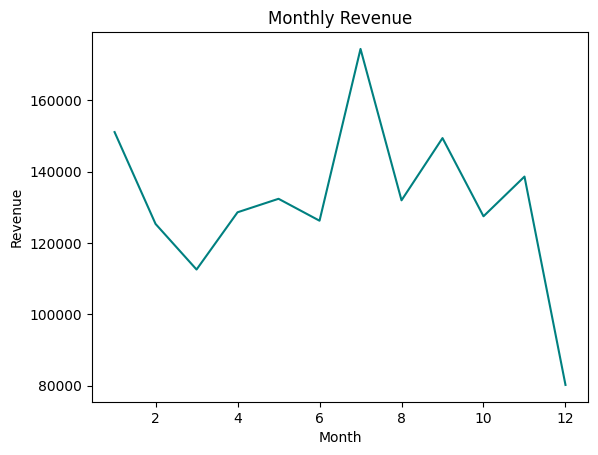

In [32]:
# c. Find the month with the highest sales and plot a graph to show monthly revenue.
df['Month'] = df['Order Date'].dt.month
monthly_revenue = df.groupby('Month')['Total Price'].sum()
print(monthly_revenue)
import matplotlib.pyplot as plt
monthly_revenue.plot(kind='line',color = 'Teal')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.show()

3.Category and City Analysis


In [13]:
# a. Group the data by Category and calculate the total revenue for each category.
category_revenue = df.groupby('Category')['Total Price'].sum()
print(category_revenue)

Category
Apparel        546446.34
Electronics    523641.32
Home Goods     508459.46
Name: Total Price, dtype: float64


In [25]:
# b. Find the city with the highest number of orders.
city_orders = df['City'].value_counts()
print('Orders form each City :\n',city_orders)
top_city = city_orders.idxmax()
print('City with highest orders : ',top_city)

Orders form each City :
 City
Phoenix        131
Houston        131
Los Angeles    131
Chicago        129
San Diego      124
San Antonio    123
Dallas         116
New York       115
Name: count, dtype: int64
city with highest orders :  Phoenix


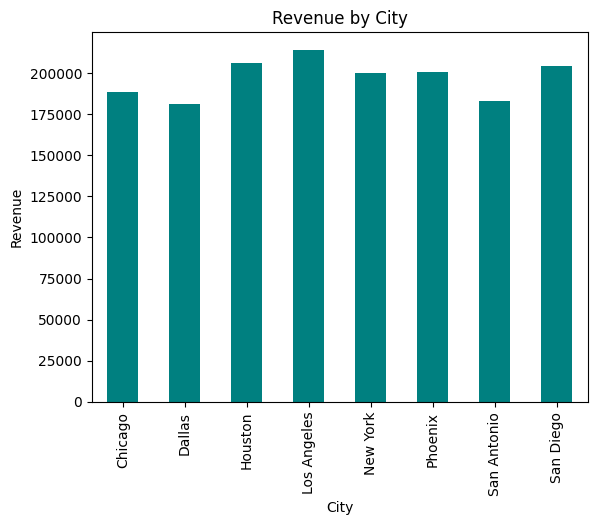

In [31]:
# c. Plot a bar chart to visualize revenue across different cities.
city_revenue = df.groupby('City')['Total Price'].sum()
city_revenue.plot(kind='bar',color = 'Teal')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.title('Revenue by City')
plt.show()

4.Customer Behavior Analysis

In [35]:
# a. Identify the customer who spent the most money and calculate their total spending.
customer_spending = df.groupby('Customer ID')['Total Price'].sum()
print('Total spending by each customer :\n',customer_spending)
top_customer = customer_spending.nlargest(1)
print('Customer with highest spending :\n ',top_customer)

Total spending by each customer :
 Customer ID
1004    3989.00
1005     576.59
1009     391.47
1013    1673.72
1015     958.71
         ...   
9962    3031.16
9964    1581.44
9979    3759.64
9980     917.88
9982     754.50
Name: Total Price, Length: 946, dtype: float64
Customer with highest spending :
  Customer ID
4626    8100.03
Name: Total Price, dtype: float64


In [38]:
# b. Find the average order value (AOV) for all customers.
Total_revenue = df['Total Price'].sum()
print('Total revenue : ',Total_revenue)
total_orders = df['Quantity Ordered'].sum()
print('Total orders : ',total_orders)

average_order_value = Total_revenue / total_orders
print('Average order value : ',average_order_value)


Total revenue :  1578547.12
Total orders :  3042
Average order value :  518.9175279421434


In [50]:
# c. Determine the product most frequently purchased by customers.
products_purchased = df.groupby('Product')['Quantity Ordered'].sum()
print('Products purchased by each customer :\n',products_purchased)
frequently_purchased = products_purchased.idxmax()

print('Most frequently purchased product  : \n',frequently_purchased,products_purchased[frequently_purchased])
#

Products purchased by each customer :
 Product
Blanket       217
Camera        205
Chair         171
Coffee Mug    196
Hat           229
Headphones    145
Jacket        205
Jeans         223
Lamp          201
Laptop        173
Pillow        221
Shoes         207
Smartphone    247
T-shirt       193
Tablet        209
Name: Quantity Ordered, dtype: int64
Most frequently purchased product  : 
 Smartphone 247


Hour
0     61285.37
1     65844.12
2     58076.36
3     72407.35
4     82530.64
5     58229.40
6     78050.41
7     56958.35
8     78375.93
9     60334.56
10    65912.68
11    44468.76
12    79937.47
13    55893.16
14    60604.22
15    99815.50
16    70560.85
17    73981.53
18    60676.61
19    60552.94
20    83840.28
21    60613.43
22    49346.55
23    40250.65
Name: Total Price, dtype: float64
Hour with highest sales  : 
 15 
 revenue : 
 99815.5


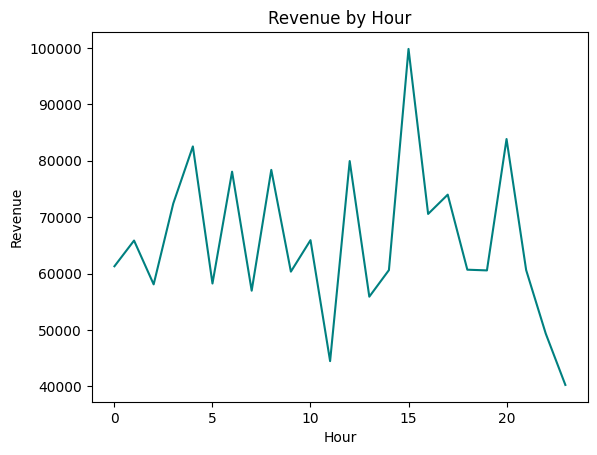

In [61]:
# a. Extract the hour from the Order Date column and determine the hour with the highest sales.
df['Hour'] = df['Order Date'].dt.hour
hourly_sales = df.groupby('Hour')['Total Price'].sum()
print(hourly_sales)
top_hour = hourly_sales.idxmax()
print('Hour with highest sales  : \n',top_hour ,'\n','revenue : \n',hourly_sales[top_hour])

#b. Create a visualization to show the distribution of sales by hour.
hourly_sales.plot(kind='line',color = 'Teal')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.title('Revenue by Hour')
plt.show()
